Import

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("../data/processed/cleaned_data.csv")

Positive vs. Negative Word

In [4]:
# Correlation between positive/negative word rates and log_shares
rate_cols = [
    "global_rate_positive_words", "global_rate_negative_words",
    "rate_positive_words", "rate_negative_words"
]

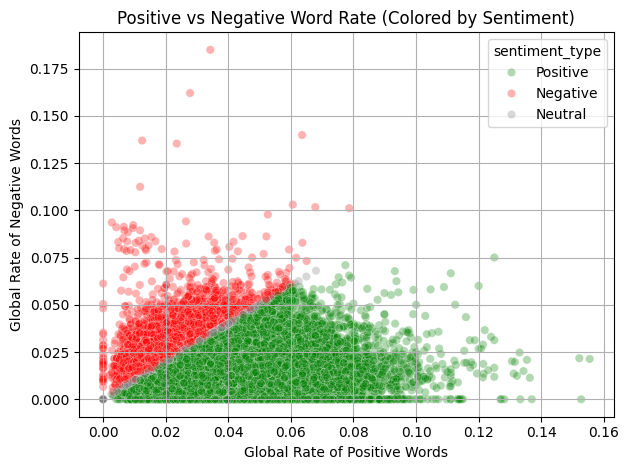

In [12]:
# Label sentiment type
df["sentiment_type"] = df.apply(
    lambda row: "Positive" if row["global_rate_positive_words"] > row["global_rate_negative_words"]
    else ("Negative" if row["global_rate_negative_words"] > row["global_rate_positive_words"]
          else "Neutral"),
    axis=1
)

# Scatterplot with hue
sns.scatterplot(
    data=df,
    x="global_rate_positive_words",
    y="global_rate_negative_words",
    hue="sentiment_type",
    palette={"Positive": "green", "Negative": "red", "Neutral": "gray"},
    alpha=0.3
)

plt.title("Positive vs Negative Word Rate (Colored by Sentiment)")
plt.xlabel("Global Rate of Positive Words")
plt.ylabel("Global Rate of Negative Words")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
print("Correlation with log_shares (Word Rates):")
for col in rate_cols:
    corr = df[col].corr(df["log_shares"])
    print(f"{col}: {corr:.4f}")

Correlation with log_shares (Word Rates):
global_rate_positive_words: 0.0410
global_rate_negative_words: -0.0060
rate_positive_words: 0.0090
rate_negative_words: -0.0482


Polarity Strength vs Log Shares

In [15]:
# Polarity score columns
polarity_cols = [
    "avg_positive_polarity", "min_positive_polarity", "max_positive_polarity",
    "avg_negative_polarity", "min_negative_polarity", "max_negative_polarity"
]

print("\nCorrelation with log_shares (Polarity Strength):")
for col in polarity_cols:
    corr = df[col].corr(df["log_shares"])
    print(f"{col}: {corr:.4f}")



Correlation with log_shares (Polarity Strength):
avg_positive_polarity: 0.0345
min_positive_polarity: -0.0108
max_positive_polarity: 0.0352
avg_negative_polarity: -0.0343
min_negative_polarity: -0.0227
max_negative_polarity: -0.0142


Are Articles More Positive or Negative? (Histogram)



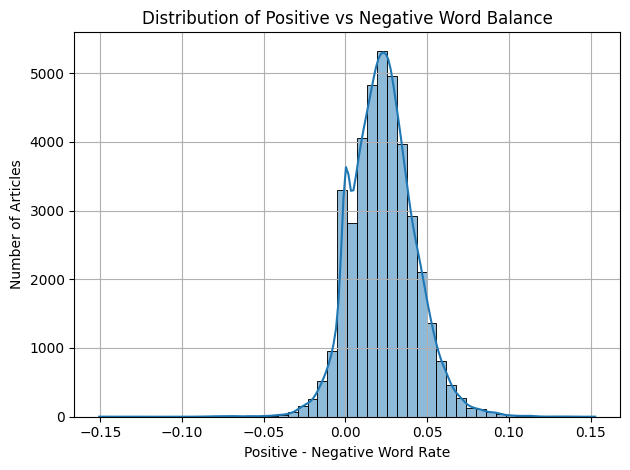

In [8]:
# Difference between positive and negative word rates
df["polarity_balance"] = df["global_rate_positive_words"] - df["global_rate_negative_words"]

sns.histplot(df["polarity_balance"], bins=50, kde=True)
plt.title("Distribution of Positive vs Negative Word Balance")
plt.xlabel("Positive - Negative Word Rate")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


Do Balanced Titles Perform Better?

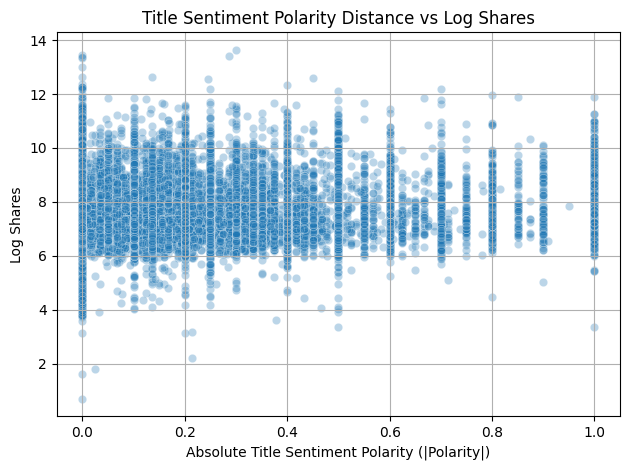


Correlation (abs_title_sentiment vs log_shares): 0.0592


In [11]:
# Absolute title polarity (how far from neutral)
df["abs_title_sentiment"] = df["title_sentiment_polarity"].abs()

sns.scatterplot(data=df, x="abs_title_sentiment", y="log_shares", alpha=0.3)
plt.title("Title Sentiment Polarity Distance vs Log Shares")
plt.xlabel("Absolute Title Sentiment Polarity (|Polarity|)")
plt.ylabel("Log Shares")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
corr = df["abs_title_sentiment"].corr(df["log_shares"])
print(f"\nCorrelation (abs_title_sentiment vs log_shares): {corr:.4f}")
